# EDA of General Product Categories

* This was the very first EDA notebook where we viewed all 2.5 years of history.
* This is a good notebook to look back on to see visuals of all the data and how it looks like in raw form.
* You'll see very clearly in this notebook that past years do not do a good job indicating the current period. Later, I found out that one of the biggest customers (that accounted for 40% of their business) pulled back on their orders in July 2018. This can clearly be seen in the yearly synopsis).




>
![alt text](https://drive.google.com/uc?id=1bkXZU02Xc1qFyWyJXQ9RetzWmpkPkuOW)


## 1. Setup and Import

In [0]:
#Colab stuffs:

#get a fast operator system
!nvidia-smi

#mount google drive
from google.colab import drive
drive.mount('/content/drive')#click on the link it provides and copy and paste that code into the authorization area

#access the OS system to work with current directories:
import os 

Wed Sep 11 17:17:35 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
#imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
sns.set_style("whitegrid")
sns.despine()
sns.set(rc={'figure.figsize':(15,9)})
%matplotlib inline

In [0]:
#Import the cleaned up data frame from the "clean up report"
#Turn the CSV files into data frames
df = pd.read_csv('drive/My Drive/Capstone_2/data/df_clean.csv', low_memory=False) 
dfwk = pd.read_csv('drive/My Drive/Capstone_2/data/df_wkly.csv', low_memory=False) 

## 2. Data Tuning

In [0]:
from datetime import datetime
cols= ['invdate','duedate','delivery',]
def change_date_time(df, cols=None):
  for col in cols:
    df[col] =  pd.to_datetime(df[col], format='%Y-%m-%d')
change_date_time(df, cols)

In [0]:
#section off a data frame with all the relevant columns
df_main = df[['invdate','invno','item','desc','ordqty', 'amount', 'profit', 'diff_quantity']]
dfwk = dfwk[['invdate','invno','ordqty', 'amount', 'profit', 'diff_quantity']]
df_main.set_index('invdate', inplace= True)
dfwk.set_index('invdate', inplace= True)

***
## Time Series Graphs

## 3.1 Annual Overviews


*   First, we will look at the profit and quantities ordered over time. Ideally, what we are looking for is a clear cyclical relationship over the past 2.5 years of invoice data. If there is a pattern, that will make a more accurate ARIMA model. If there is not, this means we will need to look into more complicated models like SVMs or Nueral Networks for prediction. 
*   **RESULTS:**
>* When looking at the quantities ordered, there is a clear spike in orders in June, and then a fall off of the orders in July.
>* If only taking into account from January 2017 through August 2018, we have a fairly steady upward trend with seasonal spikes. However, something happened from August 2018 to August 2019 where the trend turns and becomes negative interrupted by a spike in Summer 2019.
>* Thus, the summers seem to have a fairly significant relationship, but the Fall, Winter, & Spring seem to differ from year to year. This is not great news for the ARIMA model



In [0]:
months= ['Jan17', 'Feb17', 'Mar17', 'Apr17', 'May17', 'June17', 'July17', 'Aug17', 'Sep17', 'Oct17', 'Nov17', 'Dec17',
         'Jan18', 'Feb18', 'Mar18', 'Apr18', 'May18', 'June18', 'July18', 'Aug18', 'Sep18', 'Oct18', 'Nov18', 'Dec18',
         'Jan19', 'Feb19', 'Mar19', 'Apr19', 'May19', 'June19', 'July19', 'Aug19']
df_months = df_main.resample("M").sum().reset_index().set_index(pd.Index(months))

Text(0.5, 1.0, 'Cumulative Monthly Gross Revenue over 2.5 years')

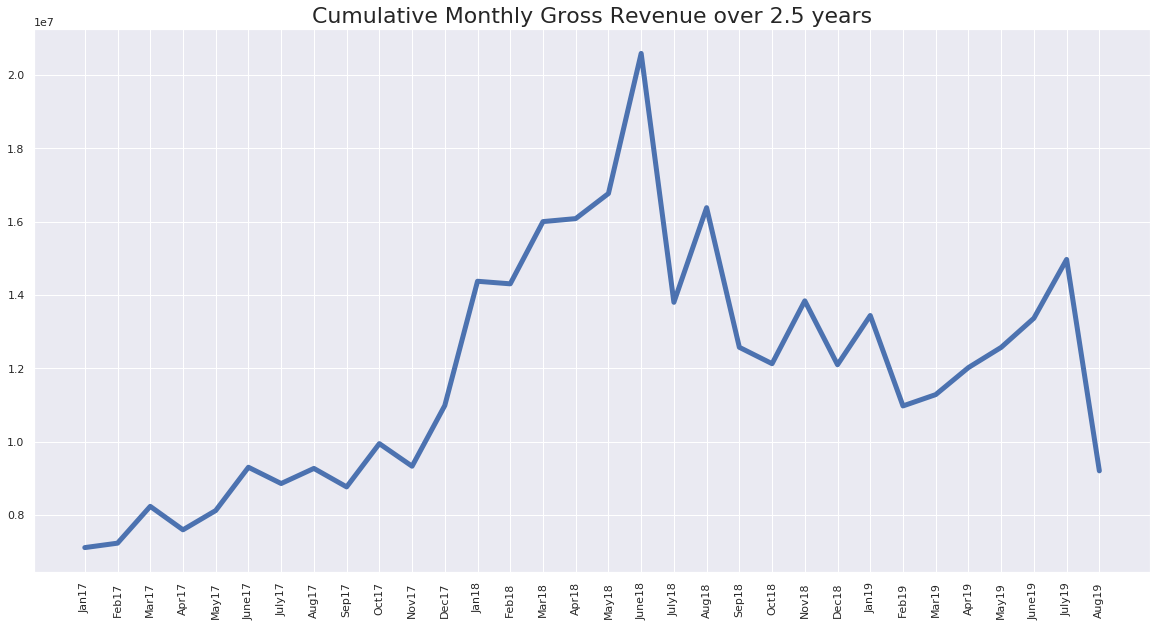

In [0]:
plt.figure(figsize=(20,10))
plt.plot(df_months.amount, linewidth= 5)
plt.xticks(rotation= 90)
plt.title("Cumulative Monthly Gross Revenue over 2.5 years", fontsize= 22)

Text(0.5, 1.0, 'Cumulative Weekly Gross Revenue over 2.5 years')

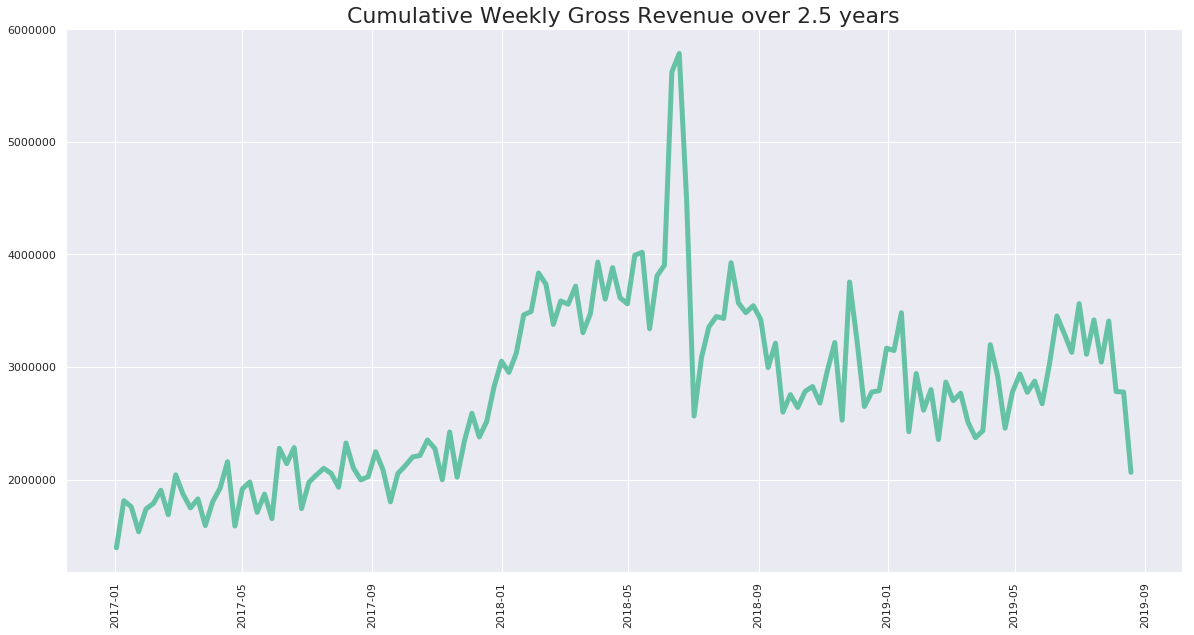

In [0]:
plt.figure(figsize=(20,10))
plt.plot(dfwk.amount, linewidth= 5, color= '#66c2a4')
plt.xticks(rotation= 90)
plt.title("Cumulative Weekly Gross Revenue over 2.5 years", fontsize= 22)

Text(0.5, 1.0, 'Cumulative Monthly Quantities Ordered over 2.5 years')

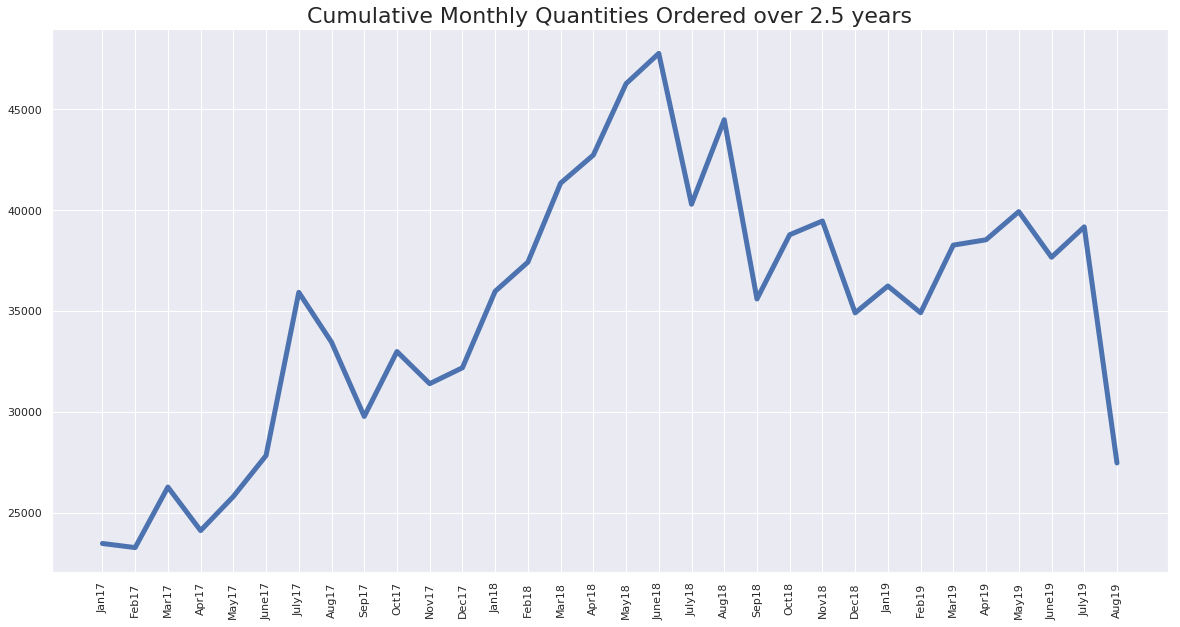

In [0]:
plt.figure(figsize=(20,10))
plt.plot(df_months.ordqty, linewidth= 5)
plt.xticks(rotation= 90)
plt.title("Cumulative Monthly Quantities Ordered over 2.5 years", fontsize= 22)

Text(0.5, 1.0, 'Cumulative Weekly Quantities Ordered over 2.5 years')

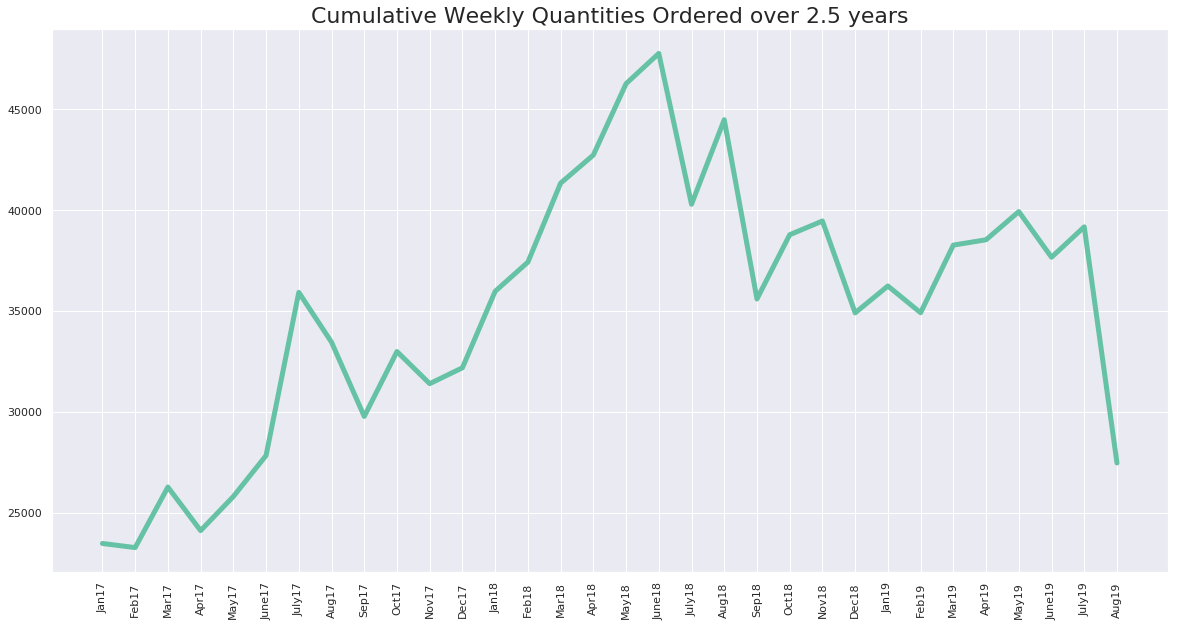

In [0]:
plt.figure(figsize=(20,10))
plt.plot(df_months.ordqty, linewidth= 5, color= '#66c2a4' )
plt.xticks(rotation= 90)
plt.title("Cumulative Weekly Quantities Ordered over 2.5 years", fontsize= 22)

## 3.2 Timeseries Overlayed by Year



*   Now I wanted to visualize the same data, but to see each year stacked on top of each other to better compare the trends across each year.
*   **RESULTS:**
>* Quantities ordered tend to spike every June or July which makes since in the produce market with an influx of fresh vegetables and fruits around June/July.
>* While 2017 seems to have a consistent upward trend, 2018 and 2019 seem to have some severe spikes and declines in gross revenue over their prime months. I have a hypothesis that this could be traced back to being understocked for their orders, and while their business has been growing over the past couple of years, perhaps they are unable to handle some of the increase in orders, or fluctuating popularity of certain produce.
>* I will invetigate this understocked their next...




In [0]:
#creating dataframes per year aggreagating the sum of different categories

#create a list for the months
months2= ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months2019 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug']

#creating dfs per year
df2017 = df_main['2017'].resample("M").sum().reset_index().set_index(pd.Index(months2))
df2018 = df_main['2018'].resample("M").sum().reset_index().set_index(pd.Index(months2))
df2019 = df_main['2019'].resample("M").sum().reset_index().set_index(pd.Index(months2019))

In [0]:
#creating weekly dfs by year

dfwk2017 = dfwk ['2017']
dfwk2018 = dfwk ['2018']
dfwk2019 = dfwk ['2019']

Text(0.5, 1.0, 'Cumulative Gross Revenue per Month')

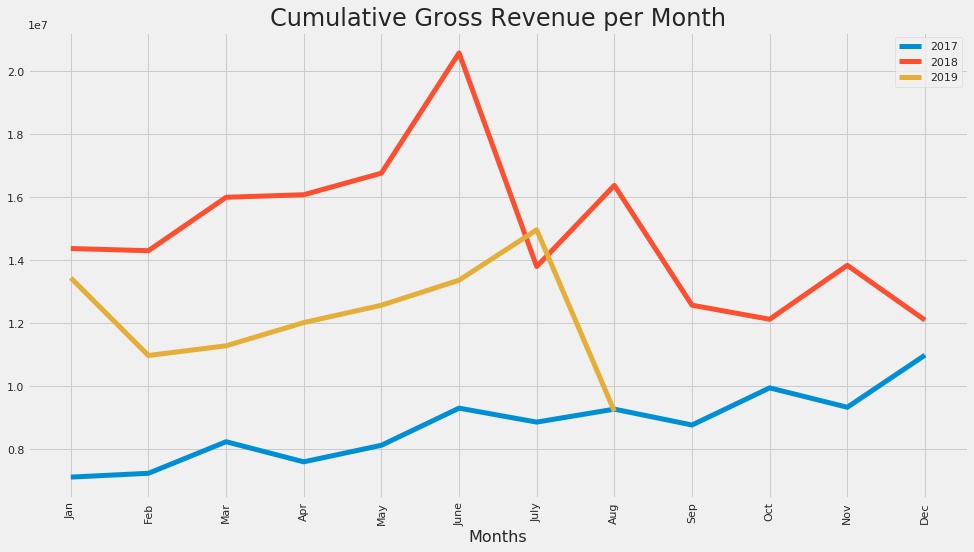

In [0]:
def graph_years (col):
  
  df_list = [(df2017, 2017), (df2018, 2018), (df2019, 2019)]
  
  plt.figure(figsize=(15,8))
  for df in df_list:
    plt.plot(df[0][col], label= df[1], linewidth= 5)
  
  plt.style.use('fivethirtyeight')
  plt.title (f"{col} per Month per Year", fontsize= 24)
  plt.xlabel ("Months", fontsize= 16)
  plt.xticks(rotation= 90)
  plt.legend()
    
graph_years('amount')
plt.title("Cumulative Gross Revenue per Month", fontsize= 24)


Text(0.5, 1.0, 'Cumulative Gross Revenue per Week')

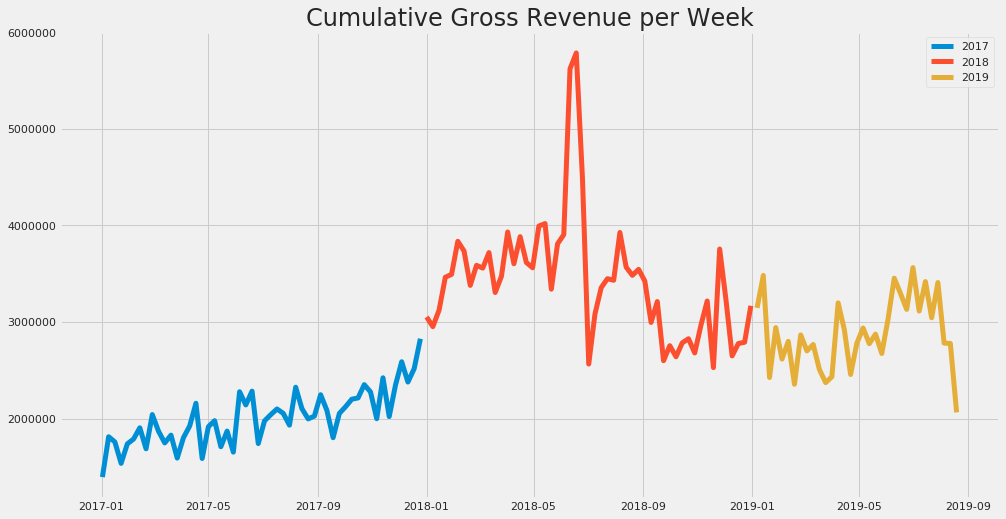

In [0]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,8))
plt.plot(dfwk2017['amount'], label= '2017', linewidth= 5)
plt.plot(dfwk2018['amount'], label= '2018', linewidth= 5)
plt.plot(dfwk2019['amount'], label= '2019', linewidth= 5)
plt.legend()
plt.title("Cumulative Gross Revenue per Week", fontsize= 24)

Text(0.5, 1.0, 'Cumulative Order Quantities per Month')

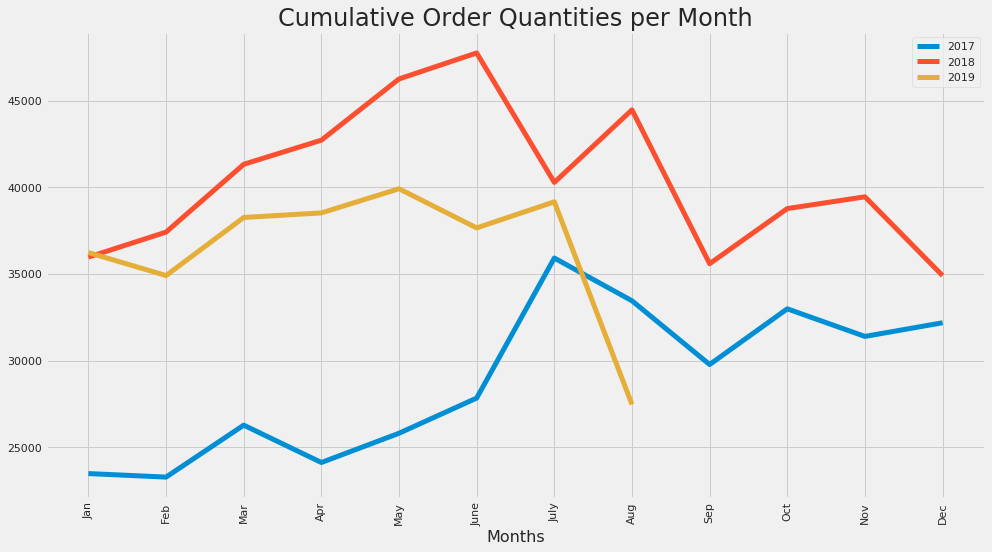

In [0]:
graph_years('ordqty')
plt.title("Cumulative Order Quantities per Month", fontsize= 24)


Text(0.5, 1.0, 'Cumulative Order Quantities per Week')

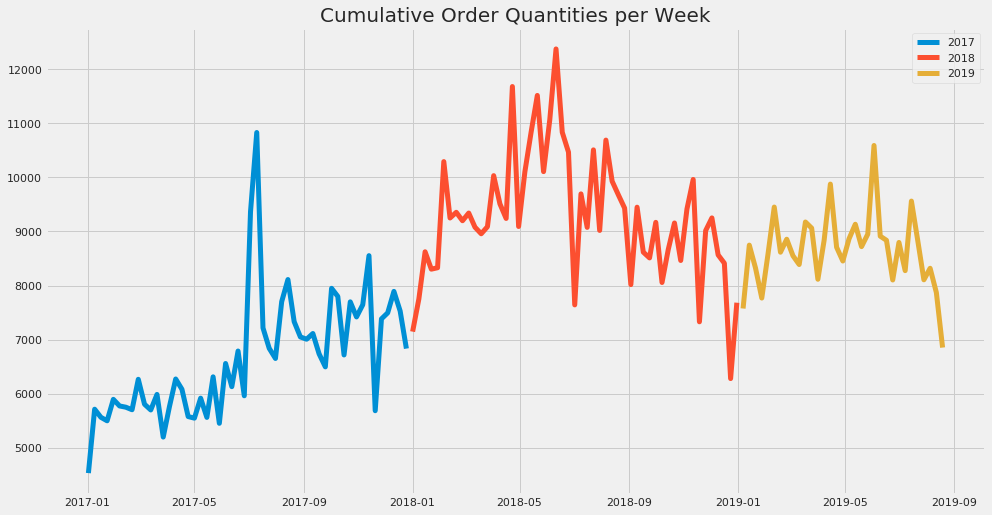

In [0]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,8))
plt.plot(dfwk2017['ordqty'], label= '2017', linewidth= 5)
plt.plot(dfwk2018['ordqty'], label= '2018', linewidth= 5)
plt.plot(dfwk2019['ordqty'], label= '2019', linewidth= 5)
plt.legend()
plt.title("Cumulative Order Quantities per Week", fontsize= 20)

## 3.3 Understocked versus Gross Revenue

I suspect that the Summer variances in orders may have something to do with being understocked... 

*  How to calculate being understocked?
>* In the dataframe provided there is a feature for order quantity and then a feature for ship quantity. I created a column measuring the difference between order quantity and ship quantity where a positive value indicates being understocked. 
>* This will only be a good measure if there is integrity with these two features in the dataset. If ship quantities are not typically filled out, or filled out quickly without attention to detail this whole theory must be thrown out because there would be no way to measure.

* **RESULTS:**
>* For the results to make sense, there needs to be an inverse relationship where a higher understocked amounts result in lower revenue, and lower understocked quantities result in higher revenue.
>* Interestingly, 2018 seems to show this best where the understocked and revenue converge in July, but otherwise show when one is high the other is low.
>* 2017 also displays an inverse relationship, but with less correlation to the upward and downward trends of the revenue
>* 2019 shows the worst correlation between understocked quantities and revenue... There is a dip in April ship quantities that isn't reflected in the revenue. 







In [0]:
#MONTHLY UNDERSTOCKED VERSUS PROFIT
# fig = plt.figure(figsize=(15,8))
# ax1 = fig.add_subplot(111)
# ax1.plot(df2017.diff_quantity, label= 'understock amt', linewidth= 5)
# ax1.set_ylabel('Understocked Amt (units)', fontsize= 14)

# ax2 = ax1.twinx()
# ax2.plot(df2017.profit, 'r-', linewidth= 5)
# ax2.set_ylabel('Sum of Profit/ Month', color='r', fontsize= 14)
# for tl in ax2.get_yticklabels():
#     tl.set_color('r')
    
# plt.title("Understocked vs. Profit 2017", fontsize= 22)
# fig.legend()
    

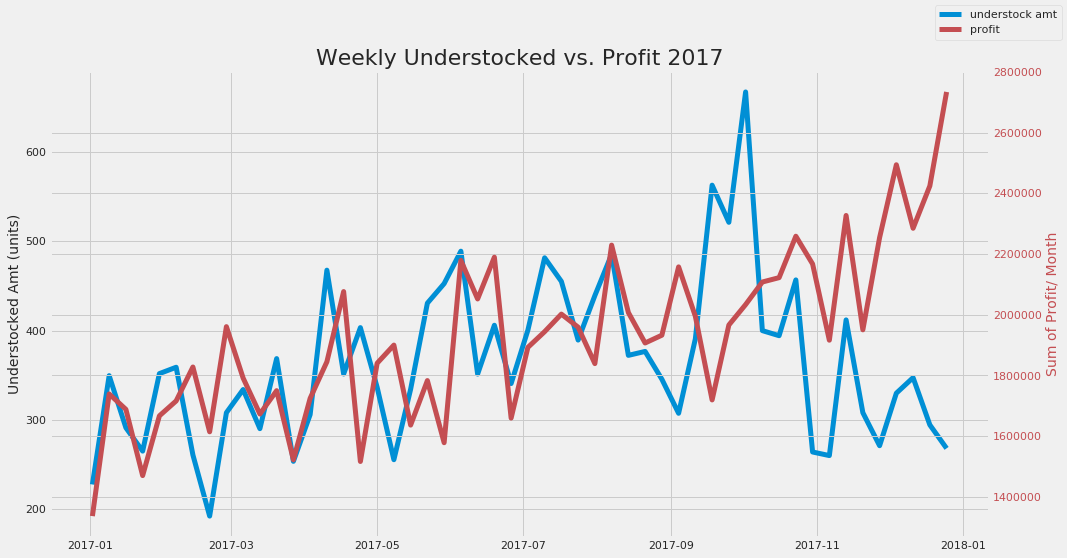

In [0]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(dfwk2017.diff_quantity, label= 'understock amt', linewidth= 5)
ax1.set_ylabel('Understocked Amt (units)', fontsize= 14)

ax2 = ax1.twinx()
ax2.plot(dfwk2017.profit, 'r-', linewidth= 5)
ax2.set_ylabel('Sum of Profit/ Month', color='r', fontsize= 14)
for tl in ax2.get_yticklabels():
    tl.set_color('r')
    
plt.title("Weekly Understocked vs. Profit 2017", fontsize= 22)
fig.legend()
    

In [0]:
#MONTHLY UNDERSTOCKED VERSUS PROFIT
# fig = plt.figure(figsize=(15,8))
# ax1 = fig.add_subplot(111)
# ax1.plot(df2018.diff_quantity, label= 'understock amt', linewidth= 5)
# ax1.set_ylabel('Understocked Amt (units)', fontsize= 14)

# ax2 = ax1.twinx()
# ax2.plot(df2018.profit, 'r-',  linewidth= 5)
# ax2.set_ylabel('Sum of Profit/ Month', color='r', fontsize= 14)
# for tl in ax2.get_yticklabels():
#     tl.set_color('r')
    
# plt.title("Understocked vs. Profit 2018", fontsize= 22)
# fig.legend()
    

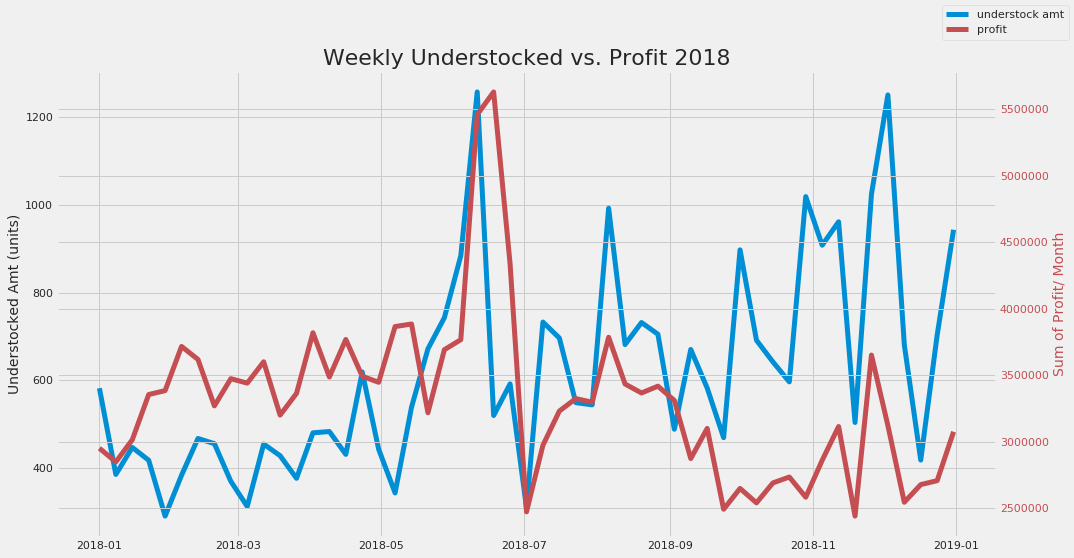

In [0]:
#WEEKLY UNDERSTOCKED VERSUS PROFIT
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(dfwk2018.diff_quantity, label= 'understock amt', linewidth= 5)
ax1.set_ylabel('Understocked Amt (units)', fontsize= 14)

ax2 = ax1.twinx()
ax2.plot(dfwk2018.profit, 'r-',  linewidth= 5)
ax2.set_ylabel('Sum of Profit/ Month', color='r', fontsize= 14)
for tl in ax2.get_yticklabels():
    tl.set_color('r')
    
plt.title("Weekly Understocked vs. Profit 2018", fontsize= 22)
fig.legend()
    

In [0]:
# #Monthly UNDERSTOCKED VERSUS PROFIT
# fig = plt.figure(figsize=(15,8))
# ax1 = fig.add_subplot(111)
# ax1.plot(df2019.diff_quantity, label= 'understock amt', linewidth= 5)
# ax1.set_ylabel('Understocked Amt (units)', fontsize= 14)

# ax2 = ax1.twinx()
# ax2.plot(df2019.profit, 'r-', linewidth= 5)
# ax2.set_ylabel('Sum of Profit/ Month', color='r', fontsize= 14)
# for tl in ax2.get_yticklabels():
#     tl.set_color('r')
    
# plt.title("Understocked vs. Profit 2019", fontsize= 22)
# fig.legend()
    


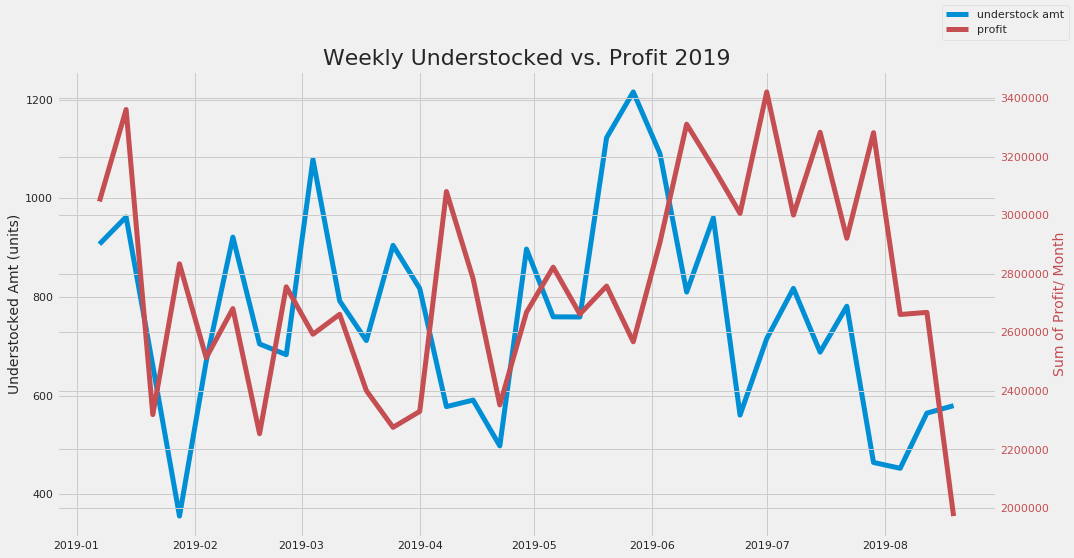

In [0]:
#Weekly UNDERSTOCKED VERSUS PROFIT
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(dfwk2019.diff_quantity, label= 'understock amt', linewidth= 5)
ax1.set_ylabel('Understocked Amt (units)', fontsize= 14)

ax2 = ax1.twinx()
ax2.plot(dfwk2019.profit, 'r-', linewidth= 5)
ax2.set_ylabel('Sum of Profit/ Month', color='r', fontsize= 14)
for tl in ax2.get_yticklabels():
    tl.set_color('r')
    
plt.title("Weekly Understocked vs. Profit 2019", fontsize= 22)
fig.legend()
    

## EDA Findings:



*   **Issues**:
>* The past 2.5 years do not seem to have a cohesive pattern. This is not good news for a model that uses past information to predict the future. Perhaps the ARIMA model won't work so well in this application.
*   **Insights**:
>* Understocked issues: There may be some correlation between profit and being understocked. You can see a high correlation in 2018. It would be wise to talk to the stakeholders and see if they were more accurate at entering the difference between "shipqty and order qty" in 2018. It was mentioned that the "shipqty" feature maybe suspect

